# Homework 2 sol (Due 4/19 11:59 PM)

## Name:

## ID:

## Instructions
Run everything (select cell in the menu, and click Run all), export as pdf, and submit the pdf to gradescope. 

To export as pdf, you can use the following methods: (1) File -> download as -> pdf (2) print as pdf from browser.

**Q1** Implement a `Rectangle` class with the following attributes and methods:
- Attributes: `width`, `height`
- Methods: 
    - `__init__(self, width, height)`: initialize the width and height of the rectangle
    - `area(self)`: return the area of the rectangle
    - `smaller_than(self, rec)`: return True if the area of the rectangle is smaller than the area of another rectange object `rec`, False otherwise
    - `resize(self, c)`: resize the rectangle, where `c` is a scaling factor. For example, if `c=2`, the width and height of the rectangle will be doubled. If `c=0.5`, the width and height of the rectangle will be halved.
    - If `rec` is a Rectangle object, `print(rec)` should print the `(width,height)` of the rectangle.
    - (Challenge, not graded) overload the '<' operator so that `rec1 < rec2` returns True if the area of rec1 is less than the area of rec2, False otherwise.



(1) Define your class here

In [2]:
# code here

class Rectangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height
    
    def area(self):
        return self.width * self.height
    
    def smaller_than(self, other):
        return self.area() < other.area()   
    
    def __repr__(self):
        return f"({self.width}, {self.height})"

    def resize(self, c):
        self.width = self.width * c
        self.height = self.height * c
    
    def __lt__(self, other):
        return self.area() < other.area()

(2) Use examples to demonstrate your class works correctly: what should be the outcome and print the output of the code

In [4]:
# code here

r1 = Rectangle(1, 2)
r2 = Rectangle(2, 3)

# should print 2
print(r1.area())

# should print (1, 2)
print(r1)

# should print True
print(r1.smaller_than(r2))

r1.resize(2)
print(r1.area()) # should print 8

# should print False
print(r1.smaller_than(r2))

# should print True
print(r2 < r1)



2
(1, 2)
True
8
False
True


Q2 Binomial Distribution: If we throw a coin $n$ times, and the the probability of getting a head is $p$. 

Let X be the number of heads. Then X is a random variable, and the probability of getting $k$ heads is given by the binomial distribution.

(1) Suppose we throw a fair coin 100 times. Intuitively, what should the distribution looks like? Find the `numpy` function that sample from the binomial distribution. Visualize the distribution using a histogram.



/Users/Ray/opt/anaconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

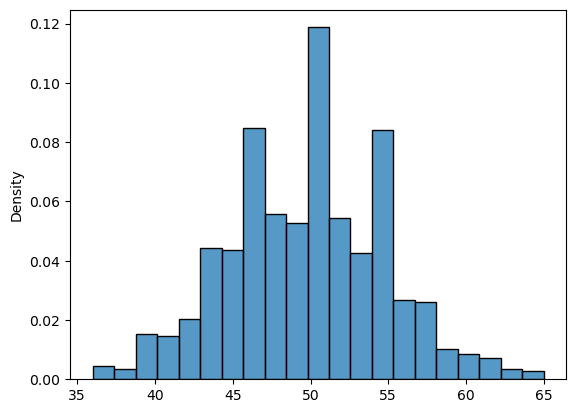

In [8]:
#code here
import numpy as np
import seaborn as sns

x = np.random.binomial(100, 0.5, 1000)

# The distribution should be a bell shape: it common to see around 50 heads, but very rare to see close to 0 or 100 heads

sns.histplot(x,stat='density')

(2) Suppose $n=100$ and $p=0.6$. Intuitively, what is the expectation of X. Estimate the expectation and variance of X numerically using 10000 samples.

In [11]:
#code here

n_sample = 10000
n = 100
p = 0.6
x = np.random.binomial(n, p, n_sample)

mean = np.mean(x)
var = np.var(x) 

print(mean, var)

60.0343 23.56992351


Q3

Explore the tip dataset. You can load the dataset from seaborn.

```python
import seaborn as sns
tips = sns.load_dataset('tips')
```

or you can download the dataset from [here](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv).


Answer the following questions. Use numbers and figures to support your answers.


(1) What is the average, median, and standard deviation of the *tip amount* and *tip percentage*?



In [14]:
import seaborn as sns
tips = sns.load_dataset('tips')

tips['tip_percentage'] = tips['tip'] / tips['total_bill']

tips.describe()

,total_bill,tip,size,tip_percentage
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


(2) Are people more willing to give higher tip when the party size is larger? Should we consider tip percentage or tip amount in this case.




-0.14285960069312353

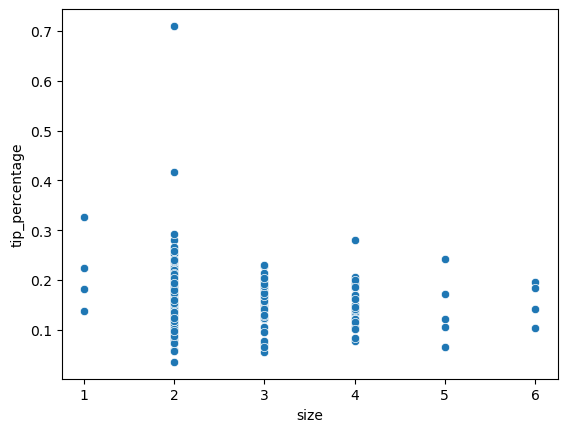

In [17]:

sns.scatterplot(data=tips, x='size', y='tip_percentage')

# compute correlation between size and tip_percentage
tips['size'].corr(tips['tip_percentage'])

# there is very small and negative correlation between size and tip_percentage.

# Using tip amount to measure willingness might not be a good:
# More people tend to have higher total_bill, and thus higher tip.
# However, based on tip percentage, it seems that they are not willing to tip more.

(3) Does the day of the week affect the tip percentage? Use figures to support your answer.

/Users/Ray/opt/anaconda3/envs/torch/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='day', ylabel='tip_percentage'>

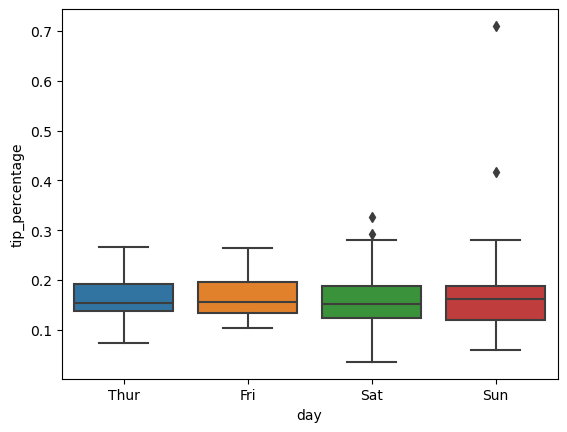

In [49]:
sns.boxplot(x="day", y="tip_percentage" ,data=tips)

# based on the boxplot, the tip percentage is quite similar across different days.

(4) If someone book a reservation with party of 4 on Saturday, what is the expected tip amount? 

In [46]:
# compute the average tip amount of table with size 4 on Saturday
tips.loc[ (tips['day'] == 'Sat') & (tips['size'] == 4),'tip'].mean()

4.123846153846154